# The Pythagorean Expectation

The Pythagorean expectation is an idea devised by the famous baseball analyst, Bill James, but it can in fact be applied to any sport.

In any sports league, teams win games by accumulating a higher total than  opponent. In baseball and cricket the relevant totals are runs, in basketball it is points, and in soccer and hockey it is goals (by "hockey" we mean here what the world outside of the US and Canada usually calls ice hockey, but in fact the same is true in field hockey).

The Pythagorean expectation can be described thus: in any season, the percentage of games won will be proportional to the square of total runs/points/goals scored by the team *squared* divided by the sum of total runs/points/goals scored by the team *squared* plus total runs/points/goals conceded by the team *squared*.

or *wpc = T<sub>F</sub><sup>2</sup> / ( T<sub>F</sub><sup>2</sup> + T<sub>A</sub><sup>2</sup> )*

Where T<sub>F</sub> is runs/points/goals scored and T<sub>A</sub> is runs/points/goals conceded.

This is a concept which can help to explain not only why teams are successful, but also can be used as the basis for predicting results in the future.

we are going to derive the Pythagorean expectation for five leagues in five different sports:

Major League Baseball
The English Premier League (soccer)
The Indian Premier League (cricket)
The National Basketball Association (NBA)
The National Hockey League (NHL)



## The Pythagorean Expectation for baseball

In [1]:
# Here are the packages we need

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# importing our data, which is a log of games played in 2018 doenloaded from Retrosheet 

MLB = pd.read_excel('D:\hopfully a career\Sports analytics\Course 1\week1\Retrosheet MLB game log 2018.xlsx')
MLB.head(15)

,Date,DoubleHeader,DayOfWeek,VisitingTeam,VisitingTeamLeague,VisitingTeamGameNumber,HomeTeam,HomeTeamLeague,HomeTeamGameNumber,VisitorRunsScored,...,HomeBatting7Name,HomeBatting7Position,HomeBatting8PlayerID,HomeBatting8Name,HomeBatting8Position,HomeBatting9PlayerID,HomeBatting9Name,HomeBatting9Position,AdditionalInfo,AcquisitionInfo
0,20180329,0,Thu,COL,NL,1,ARI,NL,1,2,...,Nick Ahmed,6,dysoj001,Jarrod Dyson,9,corbp001,Patrick Corbin,1,NaN,Y
1,20180329,0,Thu,PHI,NL,1,ATL,NL,1,5,...,Dansby Swanson,6,flahr001,Ryan Flaherty,5,tehej001,Julio Teheran,1,NaN,Y
2,20180329,0,Thu,SFN,NL,1,LAN,NL,1,1,...,Yasmani Grandal,2,forsl001,Logan Forsythe,5,kersc001,Clayton Kershaw,1,NaN,Y
3,20180329,0,Thu,CHN,NL,1,MIA,NL,1,8,...,Miguel Rojas,6,wallc001,Chad Wallach,2,urenj001,Jose Urena,1,NaN,Y
4,20180329,0,Thu,SLN,NL,1,NYN,NL,1,4,...,Kevin Plawecki,2,syndn001,Noah Syndergaard,1,rosaa003,Amed Rosario,6,NaN,Y
5,20180329,0,Thu,MIL,NL,1,SDN,NL,1,2,...,Freddy Galvis,6,hedga001,Austin Hedges,2,richc002,Clayton Richard,1,NaN,Y
6,20180329,0,Thu,MIN,AL,1,BAL,AL,1,2,...,Pedro Alvarez,10,gentc001,Craig Gentry,9,josec002,Caleb Joseph,2,NaN,Y
7,20180329,0,Thu,CHA,AL,1,KCA,AL,1,14,...,Alex Gordon,8,escoa003,Alcides Escobar,6,buted001,Drew Butera,2,NaN,Y
8,20180329,0,Thu,ANA,AL,1,OAK,AL,1,5,...,Matt Chapman,5,lucrj001,Jonathan Lucroy,2,poweb002,Boog Powell,8,NaN,Y
9,20180329,0,Thu,CLE,AL,1,SEA,AL,1,1,...,Ryon Healy,3,marjm001,Mike Marjama,2,suzui001,Ichiro Suzuki,7,NaN,Y


In [26]:
# For the Pythagorean Expectation we need only runs scored and conceded. Of course, we also need the names of the teams.

MLB18 = MLB[['VisitingTeam','HomeTeam','VisitorRunsScored','HomeRunsScore','Date']]
MLB18 = MLB18.rename(columns={'VisitorRunsScored':'VisR','HomeRunsScore':'HomR'})
MLB18.head()

,VisitingTeam,HomeTeam,VisR,HomR,Date
0,COL,ARI,2,8,20180329
1,PHI,ATL,5,8,20180329
2,SFN,LAN,1,0,20180329
3,CHN,MIA,8,4,20180329
4,SLN,NYN,4,9,20180329


In [27]:
# We will need to know who won the game - which we can tell by who scored the more runs, the home team or the visiting teams
#(there are no ties in baseball)
# The variable 'hwin' is defined here as equaling 1 if the home team scored more runs, and zero otherwise. 
# The variable 'awin' is defined in a similar way for the away team.
# we also create a 'counter' variable = 1 for each row.

MLB18['hwin']= np.where(MLB18['HomR']>MLB18['VisR'],1,0)
MLB18['awin']= np.where(MLB18['HomR']<MLB18['VisR'],1,0)
MLB18['count']=1
MLB18.head()

,VisitingTeam,HomeTeam,VisR,HomR,Date,hwin,awin,count
0,COL,ARI,2,8,20180329,1,0,1
1,PHI,ATL,5,8,20180329,1,0,1
2,SFN,LAN,1,0,20180329,0,1,1
3,CHN,MIA,8,4,20180329,0,1,1
4,SLN,NYN,4,9,20180329,1,0,1


In [28]:
# Here we define a df for home teams.
# Finally we rename the columns.
 
MLBhome = MLB18.groupby('HomeTeam')['hwin','HomR','VisR','count'].sum().reset_index()
MLBhome = MLBhome.rename(columns={'HomeTeam':'team','VisR':'VisRh','HomR':'HomRh','count':'Gh'})
MLBhome.head(10)

C:\Users\hebaa\AppData\Local\Temp\ipykernel_4720\2737375099.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  MLBhome = MLB18.groupby('HomeTeam')['hwin','HomR','VisR','count'].sum().reset_index()


,team,hwin,HomRh,VisRh,Gh
0,ANA,42,355,355,81
1,ARI,40,359,328,81
2,ATL,43,391,357,81
3,BAL,28,339,411,81
4,BOS,57,468,322,81
5,CHA,30,321,409,81
6,CHN,51,385,349,82
7,CIN,37,385,418,81
8,CLE,49,443,334,81
9,COL,47,445,404,81


In [29]:
# Now we create a similar df for teams playing as visitors 

MLBaway = MLB18.groupby('VisitingTeam')['awin','HomR','VisR','count'].sum().reset_index()
MLBaway = MLBaway.rename(columns={'VisitingTeam':'team','VisR':'VisRa','HomR':'HomRa','count':'Ga'})
MLBaway.head(10)

C:\Users\hebaa\AppData\Local\Temp\ipykernel_4720\3724352497.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  MLBaway = MLB18.groupby('VisitingTeam')['awin','HomR','VisR','count'].sum().reset_index()


,team,awin,HomRa,VisRa,Ga
0,ANA,38,367,366,81
1,ARI,42,316,334,81
2,ATL,47,300,368,81
3,BAL,19,481,283,81
4,BOS,51,325,408,81
5,CHA,32,439,335,81
6,CHN,44,296,376,81
7,CIN,30,401,311,81
8,CLE,42,314,375,81
9,COL,44,341,335,82


In [30]:
# We now merge MLBhome and MLBaway so that we have a list of all the clubs with home and away records for the 2018 season

MLB18 = pd.merge(MLBhome,MLBaway,on='team')
MLB18.head()

,team,hwin,HomRh,VisRh,Gh,awin,HomRa,VisRa,Ga
0,ANA,42,355,355,81,38,367,366,81
1,ARI,40,359,328,81,42,316,334,81
2,ATL,43,391,357,81,47,300,368,81
3,BAL,28,339,411,81,19,481,283,81
4,BOS,57,468,322,81,51,325,408,81


In [31]:
# Now we create the total wins, games, played, runs scored and run conceded by summing the totals as home team and away team

MLB18['W']=MLB18['hwin']+MLB18['awin']
MLB18['G']=MLB18['Gh']+MLB18['Ga']
MLB18['R']=MLB18['HomRh']+MLB18['VisRa']
MLB18['RA']=MLB18['VisRh']+MLB18['HomRa']
MLB18.head(10)

,team,hwin,HomRh,VisRh,Gh,awin,HomRa,VisRa,Ga,W,G,R,RA
0,ANA,42,355,355,81,38,367,366,81,80,162,721,722
1,ARI,40,359,328,81,42,316,334,81,82,162,693,644
2,ATL,43,391,357,81,47,300,368,81,90,162,759,657
3,BAL,28,339,411,81,19,481,283,81,47,162,622,892
4,BOS,57,468,322,81,51,325,408,81,108,162,876,647
5,CHA,30,321,409,81,32,439,335,81,62,162,656,848
6,CHN,51,385,349,82,44,296,376,81,95,163,761,645
7,CIN,37,385,418,81,30,401,311,81,67,162,696,819
8,CLE,49,443,334,81,42,314,375,81,91,162,818,648
9,COL,47,445,404,81,44,341,335,82,91,163,780,745


In [32]:
# The last step in preparing the data is to define win percentage and the Pythagorean Expectation.

MLB18['wpc'] = MLB18['W']/MLB18['G']
MLB18['pyth'] = MLB18['R']**2/(MLB18['R']**2 + MLB18['RA']**2)
MLB18.head(10)

,team,hwin,HomRh,VisRh,Gh,awin,HomRa,VisRa,Ga,W,G,R,RA,wpc,pyth
0,ANA,42,355,355,81,38,367,366,81,80,162,721,722,0.493827,0.499307
1,ARI,40,359,328,81,42,316,334,81,82,162,693,644,0.506173,0.536600
2,ATL,43,391,357,81,47,300,368,81,90,162,759,657,0.555556,0.571662
3,BAL,28,339,411,81,19,481,283,81,47,162,622,892,0.290123,0.327161
4,BOS,57,468,322,81,51,325,408,81,108,162,876,647,0.666667,0.647037
5,CHA,30,321,409,81,32,439,335,81,62,162,656,848,0.382716,0.374388
6,CHN,51,385,349,82,44,296,376,81,95,163,761,645,0.582822,0.581946
7,CIN,37,385,418,81,30,401,311,81,67,162,696,819,0.413580,0.419344
8,CLE,49,443,334,81,42,314,375,81,91,162,818,648,0.561728,0.614423
9,COL,47,445,404,81,44,341,335,82,91,163,780,745,0.558282,0.522939


<AxesSubplot:xlabel='pyth', ylabel='wpc'>

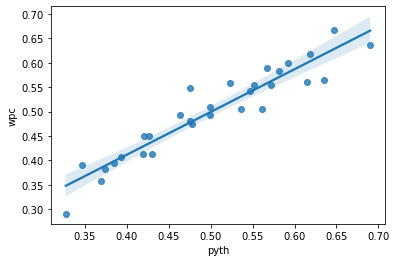

In [34]:
#Let's see the correlation between win percentage and pythagorean expectation

sns.regplot(x="pyth", y="wpc", data = MLB18)

# Finally we generate a regression.

wpc = Intercept + coef x pyth


In [35]:
# Finally we generate a regression.

pyth_lm = smf.ols(formula = 'wpc ~ pyth', data=MLB18).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wpc   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     236.2
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           3.54e-15
Time:                        22:30:34   Log-Likelihood:                 63.733
No. Observations:                  30   AIC:                            -123.5
Df Residuals:                      28   BIC:                            -120.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0609      0.029      2.093      0.046       0.001       0.120
pyth           0.8770      0.057     15.370      0.000       0.760       0.994
==============================================================================
Omnibus:                        0.145   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.930   Jarque-Bera (JB):                0.012
Skew:                          -0.009   Prob(JB):                        0.994
Kurtosis:                       2.905   Cond. No.                         13.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

You can see the value of Intercept is 0.0609 and coef is .8770. It's this latter value were interested in. It means that for every one unit increase in pyth, the value of wpc goes up by 0.887.


# Pythagorean Expectation for cricket


The Indian Premier League (IPL) is the biggest cricket competition in the world, which has all of the world's best players in an eight week tournament involving eight teams playing sixty games in total. Each team plays every other team, once at home and then away, and the competition finishes with the four best teams competing in semi-finals and then a final.  

Cricket, like baseball, is a bat and ball game, where teams score runs and the team scoring the highest number of runs is the winner. There are, of course, many differences, but statistically speaking, we can generate the same Pythagorean statistic that we generated for baseball. Our data here is derived from the competition that took place in 2018.

The IPL is played in the T20 format, in which each team has up to 120 balls to score as many runs as they can (the game takes less than three hours to complete). One difference from baseball is that runs are much easier to score - in the IPL an average score is 170 runs - and outs (wickets) are much more costly - each team has only ten outs(called wickets) in the entire game, and if you run out of wickets before the 120 balls have been bowled (pitched) then your inning is over.

With this background, let's construct the Pythagorean Expectation for the IPL in 2018.

In [36]:
# Now we import the data

IPL18 = pd.read_excel('D:\hopfully a career\Sports analytics\Course 1\week1\IPL2018teams.xlsx')
IPL18.head()

,scorecard_id,start_date,phase,name,home_team,away_team,toss_winner,toss_decision,inn1team,innings1,...,adjusted_target_indicator,adjusted_target,team1_overs,team2_overs,mom_player_id,mom_player,scoring_status,result_type,result_margin,winning_team
0,1056637,2018-04-07,NaN,"Wankhede Stadium, Mumbai",Mumbai Indians,Chennai Super Kings,Chennai Super Kings,f,Mumbai Indians,165,...,n,0,20.0,20,44613,DJ Bravo,live bbb,ww,1,Chennai Super Kings
1,1056638,2018-04-08,NaN,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Delhi Daredevils,Kings XI Punjab,f,Delhi Daredevils,166,...,n,0,20.0,20,170187,KL Rahul,live bbb,ww,6,Kings XI Punjab
2,1056639,2018-04-08,NaN,"Eden Gardens, Kolkata",Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,f,Royal Challengers Bangalore,176,...,n,0,20.0,20,412485,N Rana,live bbb,ww,4,Kolkata Knight Riders
3,1056640,2018-04-09,NaN,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Sunrisers,Rajasthan Royals,Sunrisers,f,Rajasthan Royals,125,...,n,0,20.0,20,15627,S Dhawan,live bbb,ww,9,Sunrisers
4,1056641,2018-04-10,NaN,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,f,Kolkata Knight Riders,202,...,n,0,20.0,20,119895,SW Billings,live bbb,ww,5,Chennai Super Kings


In [37]:
#First we identify when the home team is the winning team, and when the visiting team is the winner.

IPL18['hwin']= np.where(IPL18['home_team']==IPL18['winning_team'],1,0)

IPL18['awin']= np.where(IPL18['away_team']==IPL18['winning_team'],1,0)


In [38]:
#cricket stuff [unlike baseball, where there are
# nine innings for each team, in T20 cricket each team gets only one inning, and once the first completes its inning, the opposing
# team has its inning. Finally, we include a counter which we can add up to give total number of games for each team.]

IPL18['htruns']= np.where(IPL18['home_team']==IPL18['inn1team'],IPL18['innings1'],IPL18['innings2'])
IPL18['atruns']= np.where(IPL18['away_team']==IPL18['inn1team'],IPL18['innings1'],IPL18['innings2'])
IPL18['count']=1

In [39]:
#let's aggregate the performance of home teams during the season.

IPLhome = IPL18.groupby('home_team')['count','hwin', 'htruns','atruns'].sum().reset_index()
IPLhome = IPLhome.rename(columns={'home_team':'team','count':'Ph','htruns':'htrunsh','atruns':'atrunsh'})
IPLhome.head()

C:\Users\hebaa\AppData\Local\Temp\ipykernel_4720\3827420867.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  IPLhome = IPL18.groupby('home_team')['count','hwin', 'htruns','atruns'].sum().reset_index()


,team,Ph,hwin,htrunsh,atrunsh
0,Chennai Super Kings,9,8,1577,1486
1,Delhi Daredevils,7,4,1258,1122
2,Kings XI Punjab,7,4,1188,1202
3,Kolkata Knight Riders,9,5,1468,1417
4,Mumbai Indians,7,3,1194,1171


In [40]:
# Now we aggregate the performance of away teams in a different df.

IPLaway = IPL18.groupby('away_team')['count','awin', 'htruns','atruns'].sum().reset_index()
IPLaway = IPLaway.rename(columns={'away_team':'team','count':'Pa','htruns':'htrunsa','atruns':'atrunsa'})
IPLaway.head()

C:\Users\hebaa\AppData\Local\Temp\ipykernel_4720\385474628.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  IPLaway = IPL18.groupby('away_team')['count','awin', 'htruns','atruns'].sum().reset_index()


,team,Pa,awin,htrunsa,atrunsa
0,Chennai Super Kings,7,3,1264,1232
1,Delhi Daredevils,7,1,1265,1085
2,Kings XI Punjab,7,2,1124,1022
3,Kolkata Knight Riders,7,4,1326,1291
4,Mumbai Indians,7,3,1111,1186


In [41]:
# how we merge the two dfs to obtain a full record for each team across the season.

IPL18 = pd.merge(IPLhome, IPLaway, on = ['team'])
IPL18.head()

,team,Ph,hwin,htrunsh,atrunsh,Pa,awin,htrunsa,atrunsa
0,Chennai Super Kings,9,8,1577,1486,7,3,1264,1232
1,Delhi Daredevils,7,4,1258,1122,7,1,1265,1085
2,Kings XI Punjab,7,4,1188,1202,7,2,1124,1022
3,Kolkata Knight Riders,9,5,1468,1417,7,4,1326,1291
4,Mumbai Indians,7,3,1194,1171,7,3,1111,1186


In [42]:
# We now aggregate the home and away data for wins, games played and runs

IPL18['W'] = IPL18['hwin']+IPL18['awin']
IPL18['G'] = IPL18['Ph']+IPL18['Pa']
IPL18['R'] = IPL18['htrunsh']+IPL18['atrunsa']
IPL18['RA'] = IPL18['atrunsh']+IPL18['htrunsa']

# The last step in organizing the data is to create variables for win percentage (wpc) and the Pythagorean Expectation (pyth).

IPL18['wpc'] = IPL18['W']/IPL18['G']
IPL18['pyth'] = IPL18['R']**2/(IPL18['R']**2 + IPL18['RA']**2)
IPL18.head()

,team,Ph,hwin,htrunsh,atrunsh,Pa,awin,htrunsa,atrunsa,W,G,R,RA,wpc,pyth
0,Chennai Super Kings,9,8,1577,1486,7,3,1264,1232,11,16,2809,2750,0.687500,0.510612
1,Delhi Daredevils,7,4,1258,1122,7,1,1265,1085,5,14,2343,2387,0.357143,0.490698
2,Kings XI Punjab,7,4,1188,1202,7,2,1124,1022,6,14,2210,2326,0.428571,0.474444
3,Kolkata Knight Riders,9,5,1468,1417,7,4,1326,1291,9,16,2759,2743,0.562500,0.502908
4,Mumbai Indians,7,3,1194,1171,7,3,1111,1186,6,14,2380,2282,0.428571,0.521012


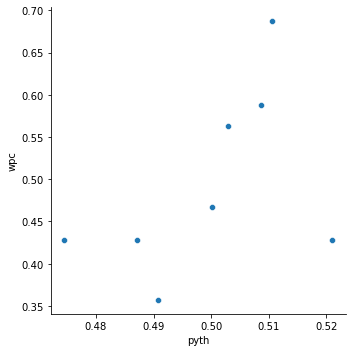

In [43]:
# let's see the correlation between pyth and wpc

sns.relplot(x="pyth", y="wpc", data =IPL18)

Unlike the MLB case, we can see that there is a very weak correlation between win percentage and the Pythagorean Expectation.


# Running a regression

We now run the same regression as we did for the MLB data: 

wpc = Intercept + coef x pyth


In [45]:
pyth_lm = smf.ols(formula = 'wpc ~ pyth', data=IPL18).fit()
pyth_lm.summary()

C:\Users\hebaa\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wpc   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     1.830
Date:                Wed, 15 Mar 2023   Prob (F-statistic):              0.225
Time:                        22:45:49   Log-Likelihood:                 7.9710
No. Observations:                   8   AIC:                            -11.94
Df Residuals:                       6   BIC:                            -11.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2807      1.312     -0.976      0.367      -4.491       1.929
pyth           3.5522      2.626      1.353      0.225      -2.872       9.977
==============================================================================
Omnibus:                        0.002   Durbin-Watson:                   2.254
Prob(Omnibus):                  0.999   Jarque-Bera (JB):                0.217
Skew:                           0.014   Prob(JB):                        0.897
Kurtosis:                       2.193   Cond. No.                         89.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This time, while coefficient on pyth is positive - implying that a higher Pythagorean Expectation leads to a large win percentage, the standard error is also very large, and the t statistic of 1.353 implies a p-value of 0.225- well above the usual threshold of 0.050, which means that the coefficient estimate is in fact insignificantly different from zero. 

But there could be basic statistical explanation. For MLB we had averages for 30 teams, each of which played about 160 games. Random variations are likely to be smoothed out when analyzing data on this scale. For the IPL we had only 8 teams, most of whom played only 14 games - so there is a much greater chance that random variations could have overwhelmed the Pythagorean model if it were correct.

# Pythagorean Expectation and the NBA

Let's see what we find this time. We follow the same procedure.

In [47]:
# Load the data and see what it looks like

NBA = pd.read_csv(r'D:\hopfully a career\Sports analytics\Course 1\week1\NBA_Games.csv')

NBA.head()

,CITY,TEAM_NAME,TEAM_ID,GAME_ID,NICKNAME,STATE,YEAR_FOUNDED,SEASON_ID,TEAM_ABBREVIATION,GAME_DATE,...,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,home,not paired
0,Oklahoma City,Oklahoma City Thunder,1.610613e+09,11300001.0,Thunder,Oklahoma,1967.0,12013.0,OKC,10/5/2013,...,34.0,52.0,22.0,9.0,8.0,20.0,26.0,13.0,A,999.0
1,Chicago,Chicago Bulls,1.610613e+09,11300002.0,Bulls,Illinois,1966.0,12013.0,CHI,10/5/2013,...,39.0,56.0,20.0,5.0,10.0,23.0,25.0,6.0,A,0.0
2,Indiana,Indiana Pacers,1.610613e+09,11300002.0,Pacers,Indiana,1976.0,12013.0,IND,10/5/2013,...,27.0,38.0,15.0,12.0,8.0,15.0,23.0,-6.0,H,0.0
3,New Orleans,New Orleans Pelicans,1.610613e+09,11300003.0,Pelicans,Louisiana,2002.0,12013.0,NOP,10/5/2013,...,21.0,33.0,17.0,12.0,4.0,15.0,32.0,1.0,A,0.0
4,Houston,Houston Rockets,1.610613e+09,11300003.0,Rockets,Texas,1967.0,12013.0,HOU,10/5/2013,...,30.0,35.0,24.0,9.0,4.0,22.0,27.0,-1.0,H,0.0


In [51]:
# Pre-season games have the prefix "1" before the year, regular season games have the prefix "2" 
# and postseason games have the prefix "4". We are going to look at the 2018 regular season and therefore
# want games with the prefix "2"

NBAR18 = NBA[NBA.SEASON_ID == 22018]
NBAR18 = NBAR18.dropna()
NBAR18['result'] = np.where(NBAR18['WL']== 'W',1,0)
NBAR18.describe()

,TEAM_ID,GAME_ID,YEAR_FOUNDED,SEASON_ID,MIN,PTS,PTSAGN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,not paired,result
count,2.472000e+03,2.472000e+03,2472.000000,2472.0,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.00000,...,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.0,2472.000000
mean,1.610613e+09,1.281113e+08,1969.664644,22018.0,238.945388,109.080097,109.080097,40.338592,88.141181,0.45810,...,34.413835,44.730583,24.051780,7.675162,4.932848,13.642799,20.748382,-0.019094,0.0,0.500000
std,8.760706e+00,3.843674e+08,16.744769,0.0,12.720983,14.392685,14.392685,5.803877,8.224533,0.05509,...,5.597726,6.800998,5.468847,2.937095,2.488895,3.884700,4.304642,14.564635,0.0,0.500101
min,1.610613e+09,2.180000e+07,1946.000000,22018.0,197.000000,53.000000,53.000000,17.000000,55.000000,0.26200,...,17.000000,22.000000,7.000000,0.000000,0.000000,3.000000,9.000000,-56.000000,0.0,0.000000
25%,1.610613e+09,2.180033e+07,1949.000000,22018.0,239.000000,100.000000,100.000000,37.000000,83.000000,0.42075,...,30.000000,40.000000,20.000000,6.000000,3.000000,11.000000,18.000000,-9.000000,0.0,0.000000
50%,1.610613e+09,2.180066e+07,1970.000000,22018.0,240.000000,110.000000,110.000000,40.000000,88.000000,0.45800,...,34.000000,44.000000,24.000000,7.000000,5.000000,13.000000,21.000000,0.000000,0.0,0.500000
75%,1.610613e+09,2.180099e+07,1980.000000,22018.0,241.000000,118.000000,118.000000,44.000000,93.000000,0.49400,...,38.000000,49.000000,28.000000,10.000000,6.000000,16.000000,23.000000,9.000000,0.0,1.000000
max,1.610613e+09,1.621800e+09,2002.000000,22018.0,341.000000,168.000000,168.000000,61.000000,123.000000,0.64900,...,55.000000,71.000000,42.000000,20.000000,19.000000,27.000000,37.000000,56.000000,0.0,1.000000


In [52]:
# For the Pythagorean Expectation we need only the result, points scored (PTS) and point conceded (PTSAGN).

NBAteams18 = NBAR18.groupby('TEAM_NAME')['result','PTS','PTSAGN'].sum().reset_index()
NBAteams18.head()

C:\Users\hebaa\AppData\Local\Temp\ipykernel_4720\3892891952.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  NBAteams18 = NBAR18.groupby('TEAM_NAME')['result','PTS','PTSAGN'].sum().reset_index()


,TEAM_NAME,result,PTS,PTSAGN
0,Atlanta Hawks,30,9742.0,10306.0
1,Boston Celtics,53,9489.0,9082.0
2,Brooklyn Nets,42,9375.0,9443.0
3,Charlotte Hornets,42,9290.0,9359.0
4,Chicago Bulls,24,8783.0,9467.0


In [53]:
# So now we can create the value for win percentage for each team in the 82 game season, and the Pythagorean Expectation.

NBAteams18['wpc'] = NBAteams18['result']/82
NBAteams18['pyth'] = NBAteams18['PTS']**2/(NBAteams18['PTS']**2 + NBAteams18['PTSAGN']**2)

NBAteams18.head()

,TEAM_NAME,result,PTS,PTSAGN,wpc,pyth
0,Atlanta Hawks,30,9742.0,10306.0,0.365854,0.471890
1,Boston Celtics,53,9489.0,9082.0,0.646341,0.521905
2,Brooklyn Nets,42,9375.0,9443.0,0.512195,0.496386
3,Charlotte Hornets,42,9290.0,9359.0,0.512195,0.496300
4,Chicago Bulls,24,8783.0,9467.0,0.292683,0.462573


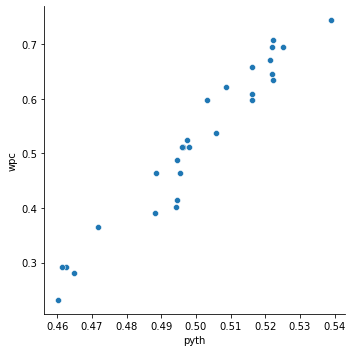

In [54]:
# We now plot the data.

sns.relplot(x="pyth", y="wpc", data = NBAteams18)

In [55]:
# Finally we run the regression: wpc = Intercept + coef x pyth

pyth_lm = smf.ols(formula = 'wpc ~ pyth', data=NBAteams18).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wpc   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     447.0
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           2.48e-18
Time:                        22:57:20   Log-Likelihood:                 57.497
No. Observations:                  29   AIC:                            -111.0
Df Residuals:                      27   BIC:                            -108.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.7572      0.155    -17.774      0.000      -3.076      -2.439
pyth           6.5536      0.310     21.143      0.000       5.918       7.190
==============================================================================
Omnibus:                        2.188   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.335   Jarque-Bera (JB):                1.779
Skew:                          -0.594   Prob(JB):                        0.411
Kurtosis:                       2.749   Cond. No.                         60.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our results look very similar to the MLB case.
The coefficient of the variable pyth is strongly significant, and the R-Squared of the regression is close to 100%.

# Pythagorean Expectation for football

We now follow the same procedure we have used to date.

In [56]:
# Load the data. 
# Our data covers the 2017/18 season

Eng18 = pd.read_excel('D:\hopfully a career\Sports analytics\Course 1\week1\Engsoccer2017-18.xlsx')
Eng18.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,EPL,2017-11-08 00:00:00,Arsenal,Leicester,4,3,H
1,EPL,2017-12-08 00:00:00,Brighton,Man City,0,2,A
2,EPL,2017-12-08 00:00:00,Chelsea,Burnley,2,3,A
3,EPL,2017-12-08 00:00:00,Crystal Palace,Huddersfield,0,3,A
4,EPL,2017-12-08 00:00:00,Everton,Stoke,1,0,H


In [57]:
# Once again our data is in the form of game results. We first identify whether the result was a win for the home team (H),
# the away team (A) or a draw (D). We also create the counting variable.

Eng18['hwinvalue']=np.where(Eng18['FTR']=='H',1,np.where(Eng18['FTR']=='D',.5,0))
Eng18['awinvalue']=np.where(Eng18['FTR']=='A',1,np.where(Eng18['FTR']=='D',.5,0))
Eng18['count']=1

In [58]:
# Once again we have to create separate dfs to calculate home team and away team performance.


Enghome = Eng18.groupby(['HomeTeam','Div'])['count','hwinvalue', 'FTHG','FTAG'].sum().reset_index()
Enghome = Enghome.rename(columns={'HomeTeam':'team','count':'Ph','FTHG':'FTHGh','FTAG':'FTAGh'})

Engaway = Eng18.groupby('AwayTeam')['count','awinvalue', 'FTHG','FTAG'].sum().reset_index()
Engaway = Engaway.rename(columns={'AwayTeam':'team','count':'Pa','FTHG':'FTHGa','FTAG':'FTAGa'})

#then we merge the home team and away team results

Eng18 = pd.merge(Enghome, Engaway, on = ['team'])
Eng18.head()

C:\Users\hebaa\AppData\Local\Temp\ipykernel_4720\714430334.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Enghome = Eng18.groupby(['HomeTeam','Div'])['count','hwinvalue', 'FTHG','FTAG'].sum().reset_index()
C:\Users\hebaa\AppData\Local\Temp\ipykernel_4720\714430334.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Engaway = Eng18.groupby('AwayTeam')['count','awinvalue', 'FTHG','FTAG'].sum().reset_index()


,team,Div,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa
0,AFC Wimbledon,FL1,23,11.0,25,30,23,9.0,28,22
1,Accrington,FL2,23,18.5,42,19,23,13.5,27,34
2,Arsenal,EPL,19,16.0,54,20,19,6.0,31,20
3,Aston Villa,FLCH,23,17.5,42,19,23,12.0,23,30
4,Barnet,FL2,23,11.0,24,25,23,6.0,40,22


In [59]:
# Sum the results by home and away measures to get the team overall performance for the season
# Then create the win percentage and Pythagorean Expectation
Eng18['W'] = Eng18['hwinvalue']+Eng18['awinvalue']
Eng18['G'] = Eng18['Ph']+Eng18['Pa']
Eng18['GF'] = Eng18['FTHGh']+Eng18['FTAGa']
Eng18['GA'] = Eng18['FTAGh']+Eng18['FTHGa']

Eng18['wpc'] = Eng18['W']/Eng18['G']
Eng18['pyth'] = Eng18['GF']**2/(Eng18['GF']**2 + Eng18['GA']**2)
Eng18.head()

,team,Div,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa,W,G,GF,GA,wpc,pyth
0,AFC Wimbledon,FL1,23,11.0,25,30,23,9.0,28,22,20.0,46,47,58,0.434783,0.396375
1,Accrington,FL2,23,18.5,42,19,23,13.5,27,34,32.0,46,76,46,0.695652,0.731880
2,Arsenal,EPL,19,16.0,54,20,19,6.0,31,20,22.0,38,74,51,0.578947,0.677974
3,Aston Villa,FLCH,23,17.5,42,19,23,12.0,23,30,29.5,46,72,42,0.641304,0.746114
4,Barnet,FL2,23,11.0,24,25,23,6.0,40,22,17.0,46,46,65,0.369565,0.333701


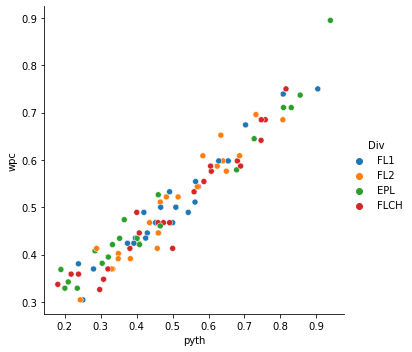

In [60]:
# Plot the data

sns.relplot(x="pyth", y="wpc", data =Eng18,hue='Div')

In [61]:
# Run the regression

pyth_lm = smf.ols(formula = 'wpc ~ pyth', data=Eng18).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wpc   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     1265.
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           8.87e-55
Time:                        23:06:08   Log-Likelihood:                 187.39
No. Observations:                  92   AIC:                            -370.8
Df Residuals:                      90   BIC:                            -365.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1803      0.010     18.804      0.000       0.161       0.199
pyth           0.6502      0.018     35.561      0.000       0.614       0.687
==============================================================================
Omnibus:                        3.561   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.169   Jarque-Bera (JB):                2.898
Skew:                           0.327   Prob(JB):                        0.235
Kurtosis:                       3.574   Cond. No.                         6.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusion

Notwithstanding the different organizational structures of soccer, we have found the Pythagorean Expectation model fits the data well.

We have now looked at league results from four different sports and found that the Pythagorean model fits the data well in three of the four. 


# But we now want to consider a different question: does the Pythagorean model work as a forecasting model?

# Pythagorean expectation as predictor in Major League Baseball


In [65]:
#let's go back to the MLB data
MLB18 = MLB[['VisitingTeam','HomeTeam','VisitorRunsScored','HomeRunsScore','Date']]
MLB18 = MLB18.rename(columns={'VisitorRunsScored':'VisR','HomeRunsScore':'HomR'})
MLB18['count']=1
MLB18.head()

,VisitingTeam,HomeTeam,VisR,HomR,Date,count
0,COL,ARI,2,8,20180329,1
1,PHI,ATL,5,8,20180329,1
2,SFN,LAN,1,0,20180329,1
3,CHN,MIA,8,4,20180329,1
4,SLN,NYN,4,9,20180329,1


In [66]:
# let's go back to the df recording team performance as home/away team
# We create an additional column 'home' which here has a value 1 to designate that these were home team games

MLBhome = MLB18[['HomeTeam','HomR','VisR','count','Date']].copy()
MLBhome['home']=1
MLBhome = MLBhome.rename(columns={'HomeTeam':'team','VisR':'RA','HomR':'R'})

#'home' now has a value 0 to designate that these were away team games

MLBaway = MLB18[['VisitingTeam','VisR','HomR','count','Date']].copy()
MLBaway['home']=0
MLBaway = MLBaway.rename(columns={'VisitingTeam':'team','VisR':'R','HomR':'RA'})

In [68]:
# Instead of taking sums and averages, we first concatenate, meaning that we stack performances as home team and away team.

MLB18 = pd.concat([MLBhome,MLBaway])
MLB18['win'] = np.where(MLB18['R']> MLB18['RA'],1,0)
MLB18.head()

,team,R,RA,count,Date,home,win
0,ARI,8,2,1,20180329,1,1
1,ATL,8,5,1,20180329,1,1
2,LAN,0,1,1,20180329,1,0
3,MIA,4,8,1,20180329,1,0
4,NYN,9,4,1,20180329,1,1


In [69]:
# let's use one part of the season as a predictor to the other part!!

Half1 = MLB18[MLB18.Date < 20180717]
Half1.describe()

,R,RA,count,Date,home,win
count,2886.000000,2886.000000,2886.0,2.886000e+03,2886.000000,2886.000000
mean,4.417533,4.417533,1.0,2.018054e+07,0.500000,0.500000
std,3.174305,3.174305,0.0,1.054102e+02,0.500087,0.500087
min,0.000000,0.000000,1.0,2.018033e+07,0.000000,0.000000
25%,2.000000,2.000000,1.0,2.018043e+07,0.000000,0.000000
50%,4.000000,4.000000,1.0,2.018052e+07,0.500000,0.500000
75%,6.000000,6.000000,1.0,2.018062e+07,1.000000,1.000000
max,20.000000,20.000000,1.0,2.018072e+07,1.000000,1.000000


In [70]:
Half2 = MLB18[MLB18.Date > 20180717]
Half2.describe()

,R,RA,count,Date,home,win
count,1976.000000,1976.000000,1976.0,1.976000e+03,1976.000000,1976.000000
mean,4.494433,4.494433,1.0,2.018084e+07,0.500000,0.500000
std,3.219870,3.219870,0.0,7.011522e+01,0.500127,0.500127
min,0.000000,0.000000,1.0,2.018072e+07,0.000000,0.000000
25%,2.000000,2.000000,1.0,2.018081e+07,0.000000,0.000000
50%,4.000000,4.000000,1.0,2.018082e+07,0.500000,0.500000
75%,6.000000,6.000000,1.0,2.018091e+07,1.000000,1.000000
max,25.000000,25.000000,1.0,2.018100e+07,1.000000,1.000000


In [74]:
# We now use .groupby to sum the number of games, wins, runs and runs against for the first half of the season.

Half1perf = Half1.groupby('team')['count','win','R','RA'].sum().reset_index()
Half1perf = Half1perf.rename(columns={'count':'count1','win':'win1','R':'R1','RA':'RA1'})

# From these statistics we calculate win percentage and Pythagorean Expectation for the first half of the season.

Half1perf['wpc1'] = Half1perf['win1']/Half1perf['count1']
Half1perf['pyth1'] = Half1perf['R1']**2/(Half1perf['R1']**2 + Half1perf['RA1']**2)
Half1perf.head()

C:\Users\hebaa\AppData\Local\Temp\ipykernel_4720\417965870.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Half1perf = Half1.groupby('team')['count','win','R','RA'].sum().reset_index()


,team,count1,win1,R1,RA1,wpc1,pyth1
0,ANA,97,49,425,401,0.505155,0.529031
1,ARI,97,53,421,378,0.546392,0.553662
2,ATL,94,52,456,388,0.553191,0.580049
3,BAL,97,28,345,504,0.288660,0.319067
4,BOS,98,68,530,367,0.693878,0.675908


In [75]:
#let's replay but with the second half of the season 

Half2perf = Half2.groupby('team')['count','win','R','RA'].sum().reset_index()
Half2perf = Half2perf.rename(columns={'count':'count2','win':'win2','R':'R2','RA':'RA2'})

Half2perf['wpc2'] = Half2perf['win2']/Half2perf['count2']
Half2perf['pyth2'] = Half2perf['R2']**2/(Half2perf['R2']**2 + Half2perf['RA2']**2)
Half2perf.head()

C:\Users\hebaa\AppData\Local\Temp\ipykernel_4720\4275031071.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Half2perf = Half2.groupby('team')['count','win','R','RA'].sum().reset_index()


,team,count2,win2,R2,RA2,wpc2,pyth2
0,ANA,65,31,296,321,0.476923,0.459548
1,ARI,65,29,272,266,0.446154,0.511151
2,ATL,68,38,303,269,0.558824,0.559231
3,BAL,65,19,277,388,0.292308,0.337607
4,BOS,64,40,346,280,0.625000,0.604272


In [76]:
# Now we merge the two dfs

Half2predictor = pd.merge(Half1perf,Half2perf, on='team')
Half2predictor.head()

,team,count1,win1,R1,RA1,wpc1,pyth1,count2,win2,R2,RA2,wpc2,pyth2
0,ANA,97,49,425,401,0.505155,0.529031,65,31,296,321,0.476923,0.459548
1,ARI,97,53,421,378,0.546392,0.553662,65,29,272,266,0.446154,0.511151
2,ATL,94,52,456,388,0.553191,0.580049,68,38,303,269,0.558824,0.559231
3,BAL,97,28,345,504,0.288660,0.319067,65,19,277,388,0.292308,0.337607
4,BOS,98,68,530,367,0.693878,0.675908,64,40,346,280,0.625000,0.604272


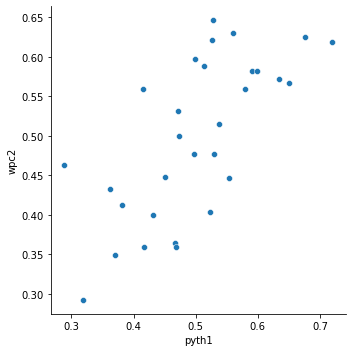

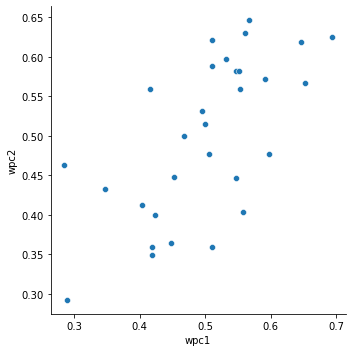

In [78]:
# Let's plot Pythagorean Expectation against win percentage in the second half of the season

sns.relplot(x="pyth1", y="wpc2", data = Half2predictor)

# Now, compare this with a plot of win percentage from the first half of the season against win percentage
#in the second half of the season

sns.relplot(x="wpc1", y="wpc2", data = Half2predictor)

They look the same!!

In [79]:
#let's see the correlation 

keyvars = Half2predictor[['team','wpc2','wpc1','pyth1','pyth2']]
keyvars.corr()

,wpc2,wpc1,pyth1,pyth2
wpc2,1.000000,0.652549,0.690752,0.924473
wpc1,0.652549,1.000000,0.941082,0.577847
pyth1,0.690752,0.941082,1.000000,0.659521
pyth2,0.924473,0.577847,0.659521,1.000000


# Conclusion

We could simply use first half win percentage as a predictor of second half win percentage, but when we look at the correlation matrix we can see that the Pythagorean Expectation is an even better forecast - the correlation coefficient is higher, at +0.691. To be sure, the difference is not large, but it is slightly better. This was, in fact, the initial impetus for Bill James when introducing the statistic. He argued that a win could ride on lucky hit and the difference of just one run, which made wins a less reliable predictor than the aggregate capacity to produce runs and limit conceding runs. As in many aspects of baseball analysis, our data show that James was quite right.